<h1 style="font-size: 26px; color: blue; text-align: center;">
    Personalized Medical Recommendation System with Machine Learning
</h1>

>
>


## About the System: Personalized Medical Recommendation Platform

- **Innovative Technology:** A state-of-the-art platform that empowers users to take control of their health.  
- **Machine Learning Integration:** Utilizes advanced algorithms to provide accurate predictions.  
- **Symptom Analysis:** Processes user-input symptoms to suggest potential health conditions.  
- **Personalized Assistance:** Designed to enhance understanding and effective health management.  


# load dataset & tools

In [1]:
# Data generation and preprocessing
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Machine learning models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

# Evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix

# Data manipulation and analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# File system operations
import os

# Display and formatting
from IPython.display import display, HTML

# Utility libraries
import numpy as np
import pickle
import sklearn
from wordcloud import WordCloud


# Disable all warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:

current_directory = os.getcwd()

print("Current Directory:", current_directory)


Current Directory: C:\Users\user\Downloads


In [3]:
new_directory = os.path.join(os.path.expanduser("~"), "Downloads")
os.chdir(new_directory)

# Data Analysis and Exploration

In [4]:
df = pd.read_csv('Training.csv')

In [5]:
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [6]:

# Inspect the first 5 rows of the data
df.head()  # Display the first 5 rows of the dataset


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [7]:

# Get detailed information about the columns, including data types and missing values
df.info()  # Show summary information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [8]:

# Check for missing values in each column
print(df.isnull().sum())  # Count the number of missing values in each column


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


In [9]:

# Get the number of unique values in each column
print(df.nunique())  # Show the number of unique values for each column


itching                  2
skin_rash                2
nodal_skin_eruptions     2
continuous_sneezing      2
shivering                2
                        ..
inflammatory_nails       2
blister                  2
red_sore_around_nose     2
yellow_crust_ooze        2
prognosis               41
Length: 133, dtype: int64


In [10]:
df.shape

(4920, 133)

In [11]:
len(df['prognosis'].unique())

41

In [12]:
df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [13]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}")

Number of Duplicate Rows: 4616


In [14]:

# Numerical analysis: Basic descriptive statistics (if applicable)
print("\nBasic Descriptive Statistics (for numerical columns):")
print(df.describe())


Basic Descriptive Statistics (for numerical columns):
           itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.14653

# train test split

In [15]:
X = df.drop('prognosis', axis=1)
y = df['prognosis']

# ecoding prognonsis
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3444, 132), (1476, 132), (3444,), (1476,))

# Training top models

In [17]:
# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='linear'), 
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB()
}

In [18]:
# Loop through the models, train, test, and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

    print("\n" + "="*50 + "\n")
 

SVC Accuracy: 1.0
SVC Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


RandomForest Accuracy: 1.0
RandomForest Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


GradientBoosting Accuracy: 1.0
GradientBoosting Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]


KNeighbors Accuracy: 1.0
KNeighbors Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ..

# single prediction

In [19]:
# selecting svc
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test,ypred)

1.0

In [20]:
# save svc
import pickle
pickle.dump(svc,open('svc.pkl','wb'))

In [21]:
# load model
svc = pickle.load(open('svc.pkl','rb'))

In [22]:
# test 1:
print("predicted disease :",svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

predicted disease : [40]
Actual Disease : 40


In [23]:
# test 2:
print("predicted disease :",svc.predict(X_test.iloc[100].values.reshape(1,-1)))
print("Actual Disease :", y_test[100])

predicted disease : [39]
Actual Disease : 39


<h2 style="font-size: 26px; color: blue; text-align: center;">
    Recommendation System and Prediction
</h2>


# load database and use logic for recommendations


In [24]:
precautions = pd.read_csv("precautions_df.csv")

In [25]:
# Display the first 5 rows of the data
print("Displaying the first 5 rows of the dataset:")
precautions.head()

Displaying the first 5 rows of the dataset:


,Unnamed: 0,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [26]:
# Data analysis
print("\nDataset Analysis:")
print(f"Number of rows: {precautions.shape[0]}")
print(f"Number of columns: {precautions.shape[1]}")
print("\nColumns and their data types:")
print(precautions.dtypes)


Dataset Analysis:
Number of rows: 41
Number of columns: 6

Columns and their data types:
Unnamed: 0       int64
Disease         object
Precaution_1    object
Precaution_2    object
Precaution_3    object
Precaution_4    object
dtype: object


In [27]:
# Check for missing values
print("\nNumber of missing values in each column:")
print(precautions.isnull().sum())


Number of missing values in each column:
Unnamed: 0      0
Disease         0
Precaution_1    0
Precaution_2    0
Precaution_3    1
Precaution_4    1
dtype: int64


In [28]:

# Analysis and visualization of precautions for each disease
precautions_columns = precautions.columns[1:]  # All columns containing precautions

In [29]:
precautions_columns

Index(['Disease', 'Precaution_1', 'Precaution_2', 'Precaution_3',
       'Precaution_4'],
      dtype='object')

In [30]:

sym_des = pd.read_csv("symtoms_df.csv")

In [31]:

# Display the first few rows
print("First 5 rows of the dataset:")
sym_des.head()

First 5 rows of the dataset:


,Unnamed: 0,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
1,1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN
2,2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN
3,3,Fungal infection,itching,skin_rash,dischromic _patches,NaN
4,4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN


In [32]:
# Display dataset summary
print("\nDataset Summary:")
print(df.info())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB
None


In [33]:

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


In [34]:
description = pd.read_csv("description.csv")


In [35]:
# Displaying the first few rows of the data to understand its structure
print(description.head())

               Disease                                        Description
0     Fungal infection  Fungal infection is a common skin condition ca...
1              Allergy  Allergy is an immune system reaction to a subs...
2                 GERD  GERD (Gastroesophageal Reflux Disease) is a di...
3  Chronic cholestasis  Chronic cholestasis is a condition where bile ...
4        Drug Reaction  Drug Reaction occurs when the body reacts adve...


In [36]:
# Display general information about the dataset
print(description.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      41 non-null     object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes
None


In [37]:
# Checking for missing values
print(description.isnull().sum())

Disease        0
Description    0
dtype: int64


In [38]:
diets = pd.read_csv("diets.csv")

In [39]:
# Display the first few rows of the dataset
print("Dataset Preview:")
diets.head()

Dataset Preview:


,Disease,Diet
0,Fungal infection,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C..."
1,Allergy,"['Elimination Diet', 'Omega-3-rich foods', 'Vi..."
2,GERD,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
3,Chronic cholestasis,"['Low-Fat Diet', 'High-Fiber Diet', 'Lean prot..."
4,Drug Reaction,"['Antihistamine Diet', 'Omega-3-rich foods', '..."


In [40]:

# Basic Information about the dataset
print("\nDataset Information:")
print(diets.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Disease  41 non-null     object
 1   Diet     41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes
None


In [41]:
# Summary statistics
print("\nSummary Statistics:")
print(f"Number of unique diseases: {diets['Disease'].nunique()}")
print(f"Number of unique diets: {diets['Diet'].nunique()}")



Summary Statistics:
Number of unique diseases: 41
Number of unique diets: 36


In [42]:
# Count diets per disease
diets_count = diets.groupby('Disease')['Diet'].count()
print("\nNumber of diets per disease:")
print(diets_count)


Number of diets per disease:
Disease
(vertigo) Paroymsal Positional Vertigo    1
AIDS                                      1
Acne                                      1
Alcoholic hepatitis                       1
Allergy                                   1
Arthritis                                 1
Bronchial Asthma                          1
Cervical spondylosis                      1
Chicken pox                               1
Chronic cholestasis                       1
Common Cold                               1
Dengue                                    1
Diabetes                                  1
Dimorphic hemmorhoids(piles)              1
Drug Reaction                             1
Fungal infection                          1
GERD                                      1
Gastroenteritis                           1
Heart attack                              1
Hepatitis B                               1
Hepatitis C                               1
Hepatitis D                           

In [43]:
# Statistical analysis of diet distribution
mean_diets = diets_count.mean()
std_diets = diets_count.std()
max_diets = diets_count.max()
min_diets = diets_count.min()

In [44]:

print(f"\nMean number of diets per disease: {mean_diets}")
print(f"Standard deviation of diets per disease: {std_diets}")
print(f"Maximum number of diets for a single disease: {max_diets}")
print(f"Minimum number of diets for a single disease: {min_diets}")


Mean number of diets per disease: 1.0
Standard deviation of diets per disease: 0.0
Maximum number of diets for a single disease: 1
Minimum number of diets for a single disease: 1


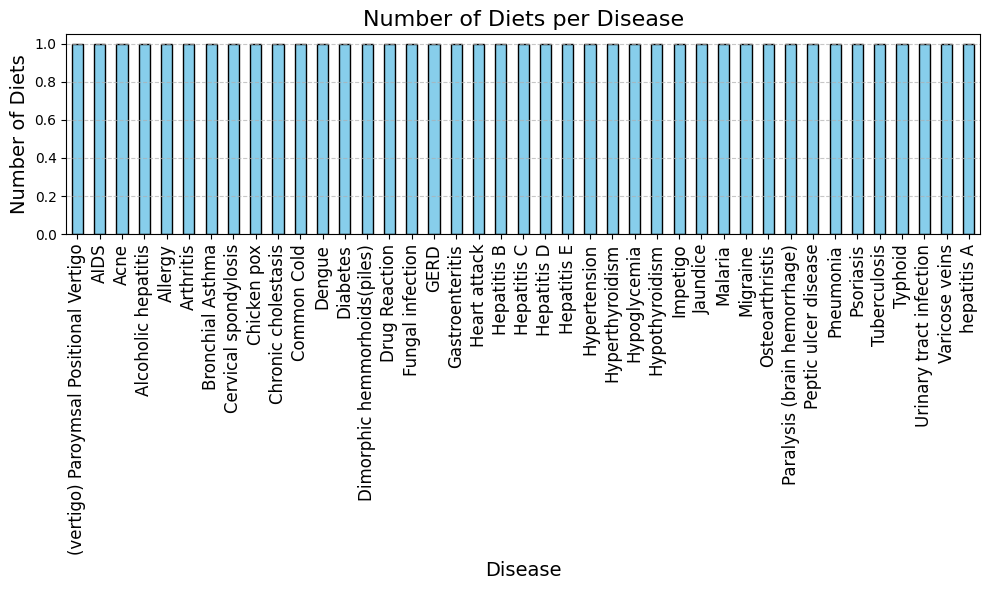

In [45]:
# Visualization

# Bar plot for number of diets per disease
plt.figure(figsize=(10, 6))
diets_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Diets per Disease', fontsize=16)
plt.xlabel('Disease', fontsize=14)
plt.ylabel('Number of Diets', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [46]:
medications = pd.read_csv('medications.csv')


In [47]:

# Display the first few rows of the dataset
print("Dataset Preview:")
medications.head()

Dataset Preview:


,Disease,Medication
0,Fungal infection,"['Antifungal Cream', 'Fluconazole', 'Terbinafi..."
1,Allergy,"['Antihistamines', 'Decongestants', 'Epinephri..."
2,GERD,"['Proton Pump Inhibitors (PPIs)', 'H2 Blockers..."
3,Chronic cholestasis,"['Ursodeoxycholic acid', 'Cholestyramine', 'Me..."
4,Drug Reaction,"['Antihistamines', 'Epinephrine', 'Corticoster..."


In [48]:

# Basic Information about the dataset
print("\nDataset Information:")
print(medications.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     41 non-null     object
 1   Medication  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes
None


In [49]:

# Summary statistics
print("\nSummary Statistics:")
print(f"Number of unique diseases: {medications['Disease'].nunique()}")
print(f"Number of unique medications: {medications['Medication'].nunique()}")


Summary Statistics:
Number of unique diseases: 41
Number of unique medications: 38


In [50]:
# Count medications per disease
medications_count = medications.groupby('Disease')['Medication'].count()
print("\nNumber of medications per disease:")
print(medications_count)


Number of medications per disease:
Disease
(vertigo) Paroymsal Positional Vertigo    1
AIDS                                      1
Acne                                      1
Alcoholic hepatitis                       1
Allergy                                   1
Arthritis                                 1
Bronchial Asthma                          1
Cervical spondylosis                      1
Chicken pox                               1
Chronic cholestasis                       1
Common Cold                               1
Dengue                                    1
Diabetes                                  1
Dimorphic hemmorhoids(piles)              1
Drug Reaction                             1
Fungal infection                          1
GERD                                      1
Gastroenteritis                           1
Heart attack                              1
Hepatitis B                               1
Hepatitis C                               1
Hepatitis D                     

In [51]:

# Statistical analysis of medication distribution
mean_medications = medications_count.mean()
std_medications = medications_count.std()
max_medications = medications_count.max()
min_medications = medications_count.min()

print(f"\nMean number of medications per disease: {mean_medications}")
print(f"Standard deviation of medications per disease: {std_medications}")
print(f"Maximum number of medications for a single disease: {max_medications}")
print(f"Minimum number of medications for a single disease: {min_medications}")


Mean number of medications per disease: 1.0
Standard deviation of medications per disease: 0.0
Maximum number of medications for a single disease: 1
Minimum number of medications for a single disease: 1


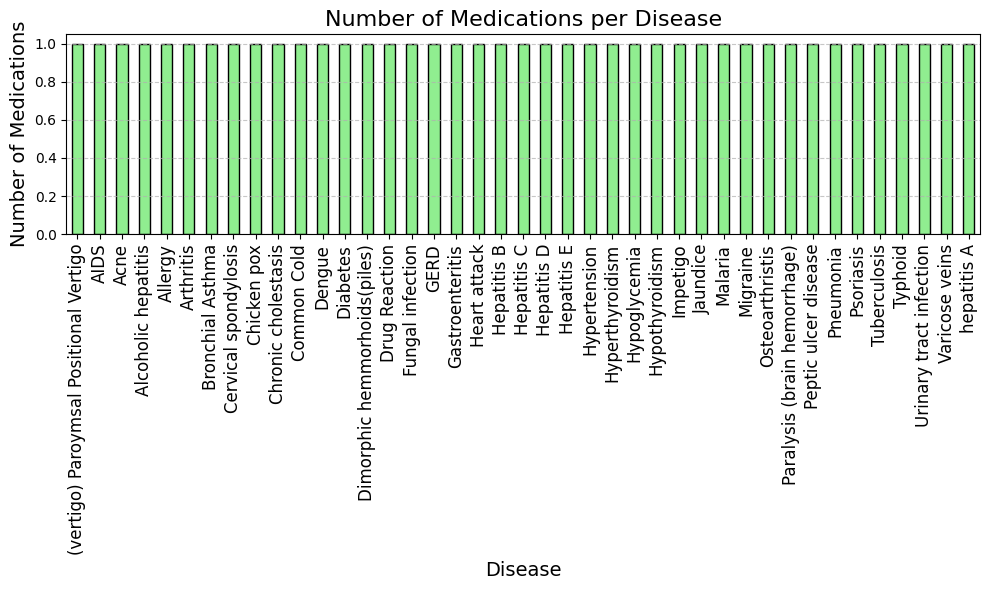

In [52]:

# Visualization

# Bar plot for number of medications per disease
plt.figure(figsize=(10, 6))
medications_count.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Medications per Disease', fontsize=16)
plt.xlabel('Disease', fontsize=14)
plt.ylabel('Number of Medications', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

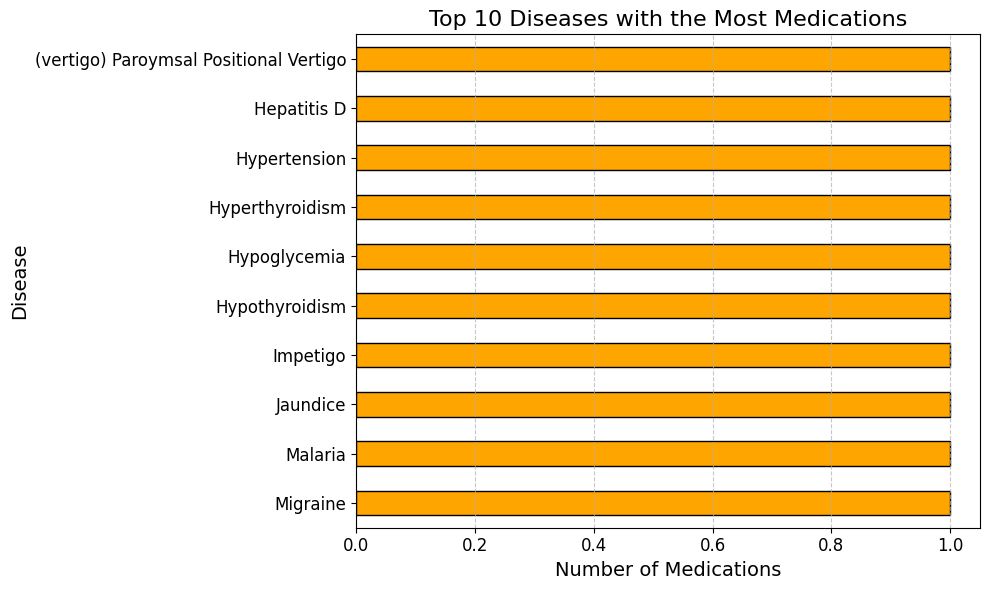

In [53]:

# Top 10 diseases with the most medications
top_diseases = medications_count.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_diseases.plot(kind='barh', color='orange', edgecolor='black')
plt.title('Top 10 Diseases with the Most Medications', fontsize=16)
plt.xlabel('Number of Medications', fontsize=14)
plt.ylabel('Disease', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis for horizontal bar chart
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [54]:
workout = pd.read_csv("workout_df.csv")

In [55]:
# Display the first few rows of the dataset
print("Dataset Preview:")
workout.head()

Dataset Preview:


,Unnamed: 0.1,Unnamed: 0,disease,workout
0,0,0,Fungal infection,Avoid sugary foods
1,1,1,Fungal infection,Consume probiotics
2,2,2,Fungal infection,Increase intake of garlic
3,3,3,Fungal infection,Include yogurt in diet
4,4,4,Fungal infection,Limit processed foods


In [56]:
# Basic information about the dataset
print("\nDataset Information:")
print(workout.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  410 non-null    int64 
 1   Unnamed: 0    410 non-null    int64 
 2   disease       410 non-null    object
 3   workout       410 non-null    object
dtypes: int64(2), object(2)
memory usage: 12.9+ KB
None


In [57]:
# Check for missing values
missing_values = workout.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Unnamed: 0.1    0
Unnamed: 0      0
disease         0
workout         0
dtype: int64


In [58]:
# Unique counts for categorical columns
for col in workout.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in '{col}': {workout[col].nunique()}")
    print(workout[col].value_counts())


Unique values in 'disease': 41
disease
Fungal infection                           10
Hepatitis C                                10
Hepatitis E                                10
Alcoholic hepatitis                        10
Tuberculosis                               10
Common Cold                                10
Pneumonia                                  10
Dimorphic hemmorhoids(piles)               10
Heart attack                               10
Varicose veins                             10
Hypothyroidism                             10
Hyperthyroidism                            10
Hypoglycemia                               10
Osteoarthristis                            10
Arthritis                                  10
(vertigo) Paroymsal  Positional Vertigo    10
Acne                                       10
Urinary tract infection                    10
Psoriasis                                  10
Hepatitis D                                10
Hepatitis B                             

In [66]:
#============================================================
# custome and helping functions
#==========================helper funtions================
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [67]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


Enter your symptoms....... itching,skin_rash,nodal_skin_eruptions


=================predicted disease============
Fungal infection
=================description==================
Fungal infection is a common skin condition caused by fungi.
=================precautions==================
1 :  bath twice
2 :  use detol or neem in bathing water
3 :  keep infected area dry
4 :  use clean cloths
=================medications==================
5 :  ['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
=================workout==================
6 :  Avoid sugary foods
7 :  Consume probiotics
8 :  Increase intake of garlic
9 :  Include yogurt in diet
10 :  Limit processed foods
11 :  Stay hydrated
12 :  Consume green tea
13 :  Eat foods rich in zinc
14 :  Include turmeric in diet
15 :  Eat fruits and vegetables
=================diets==================
16 :  ['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']


In [68]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1


Enter your symptoms....... yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister


=================predicted disease============
Impetigo
=================description==================
Impetigo is a highly contagious skin infection causing red sores that can break open.
=================precautions==================
1 :  soak affected area in warm water
2 :  use antibiotics
3 :  remove scabs with wet compressed cloth
4 :  consult doctor
=================medications==================
5 :  ['Topical antibiotics', 'Oral antibiotics', 'Antiseptics', 'Ointments', 'Warm compresses']
=================workout==================
6 :  Maintain good hygiene
7 :  Stay hydrated
8 :  Consume nutrient-rich foods
9 :  Limit sugary foods and beverages
10 :  Include foods rich in vitamin C
11 :  Consult a healthcare professional
12 :  Follow medical recommendations
13 :  Avoid scratching
14 :  Take prescribed antibiotics
15 :  Practice wound care
=================diets==================
16 :  ['Impetigo Diet', 'Antibiotic treatment', 'Fruits and vegetables', 'Hydration', 'Protein-rich

<h1 style="text-align: center; color: #4CAF50;">Welcome to the Medical System Project</h1>
<p style="text-align: center;">This page serves as an overview of the project and its goals. Below, you'll find enhanced questions and answers related to the project's purpose, challenges, and future scope.</p>

<div style="background-color: #f9f9f9; border-left: 5px solid #4CAF50; padding: 10px; margin-bottom: 20px;">
    <strong style="color: #2196F3;">Q1: What is the main goal of this project?</strong>
    <p>The main goal is to provide preliminary health advice based on symptoms and help users identify potential diseases.</p>
</div>

<div style="background-color: #f9f9f9; border-left: 5px solid #4CAF50; padding: 10px; margin-bottom: 20px;">
    <strong style="color: #2196F3;">Q2: Why was this project created?</strong>
    <p>It was created to offer accessible health assessments for individuals who may not have immediate access to healthcare professionals.</p>
</div>

<div style="background-color: #f9f9f9; border-left: 5px solid #4CAF50; padding: 10px; margin-bottom: 20px;">
    <strong style="color: #2196F3;">Q3: What societal need does this project address?</strong>
    <p>It addresses the need for quick and reliable preliminary medical assessments, especially in remote areas or during emergencies.</p>
</div>

<div style="background-color: #f9f9f9; border-left: 5px solid #4CAF50; padding: 10px; margin-bottom: 20px;">
    <strong style="color: #2196F3;">Q4: Who is the target audience for this system?</strong>
    <p>The system targets individuals seeking health advice and initial assessments, particularly those in underserved regions.</p>
</div>

<div style="background-color: #f9f9f9; border-left: 5px solid #4CAF50; padding: 10px; margin-bottom: 20px;">
    <strong style="color: #2196F3;">Q5: What makes this project unique?</strong>
    <p>The combination of machine learning for disease prediction with personalized health advice distinguishes it from other tools.</p>
</div>

<div style="background-color: #f9f9f9; border-left: 5px solid #4CAF50; padding: 10px; margin-bottom: 20px;">
    <strong style="color: #2196F3;">Q6: What challenges does this project aim to solve?</strong>
    <p>It aims to reduce delays in receiving medical advice and bridge the gap between patients and healthcare services.</p>
</div>

<div style="background-color: #f9f9f9; border-left: 5px solid #4CAF50; padding: 10px; margin-bottom: 20px;">
    <strong style="color: #2196F3;">Q7: How can this project benefit healthcare systems?</strong>
    <p>By reducing unnecessary consultations, it eases the burden on healthcare providers and optimizes resource use.</p>
</div>

<div style="background-color: #f9f9f9; border-left: 5px solid #4CAF50; padding: 10px; margin-bottom: 20px;">
    <strong style="color: #2196F3;">Q8: What are the limitations of this project?</strong>
    <p>It cannot replace professional medical advice and relies heavily on the quality and comprehensiveness of its training data.</p>
</div>

<div style="background-color: #f9f9f9; border-left: 5px solid #4CAF50; padding: 10px; margin-bottom: 20px;">
    <strong style="color: #2196F3;">Q9: What inspired the development of this project?</strong>
    <p>The project was inspired by global healthcare challenges, particularly during crises like the COVID-19 pandemic.</p>
</div>

<div style="background-color: #f9f9f9; border-left: 5px solid #4CAF50; padding: 10px;">
    <strong style="color: #2196F3;">Q10: What future enhancements are planned for this project?</strong>
    <p>Plans include improving AI accuracy, adding real-time data integration, and supporting multiple languages for global accessibility.</p>
</div>

<p style="text-align: center;">To learn more about this project, explore the enhanced comments in the source code!</p>
roject, explore the comments in the source code!</p>
explore the comments in the source code!</p>
</body>
</html>


<h2 style="font-size: 30px; color: green; text-align: center;">
    Thank You!
</h2>
<p style="font-size: 20px; color: blue; text-align: center;">
    Your attention and effort are greatly appreciated. Thank you for your time!
</p>
